In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline

In [3]:
#IMPLEMENTING K-MEANS


def find_closest_centroids(X, centroids):
    K = centroids.shape[0]

    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []

        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

In [4]:
X = load_data()

In [5]:
print("First five elements of X are:\n",X[:5])
print('The shape of X is :',X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is : (300, 2)


In [6]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])

idx = find_closest_centroids(X, initial_centroids)

print("First three elements of idx are :", idx[:3])


First three elements of idx are : [0 2 1]


In [11]:
#Compute Centroids Means

def compute_centroids(X, idx, K):
    m, n = X.shape

    centroids = np.zeros((K,n))

    for i in range(K):
        points = X[idx == i]
        centroids[i] = np.mean(points, axis=0)

    return centroids

In [12]:
K=3
centroids = compute_centroids(X, idx, K)

print("The centroids are :", centroids)

The centroids are : [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [16]:
def run_kMeans(X, initial_centroids, max_iters = 10, plot_progress=False):

    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8,6))

    for i in range(max_iters):
        print("K-Means iteration %d%d" % (i,max_iters-1))

        idx = find_closest_centroids(X,centroids)

        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

            centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

K-Means iteration 09
K-Means iteration 19
K-Means iteration 29
K-Means iteration 39
K-Means iteration 49
K-Means iteration 59
K-Means iteration 69
K-Means iteration 79
K-Means iteration 89
K-Means iteration 99


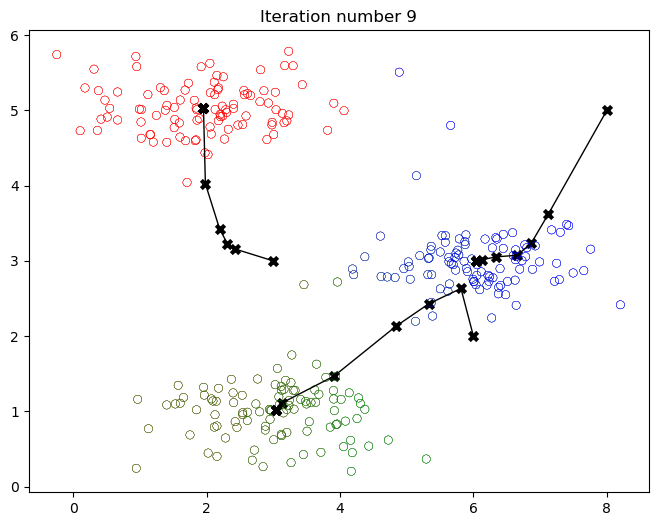

In [17]:
X = load_data()

initial_centroids = np.array([[3,3], [6,2], [8,5]])

max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [18]:
#Random initialization

def kMeans_init_centroids(X,K):

    randidx = np.random.permutation(X.shape[0])

    centroids = X[randidx[:K]]

    return centroids

K-Means iteration 09
K-Means iteration 19
K-Means iteration 29
K-Means iteration 39
K-Means iteration 49
K-Means iteration 59
K-Means iteration 69
K-Means iteration 79
K-Means iteration 89
K-Means iteration 99


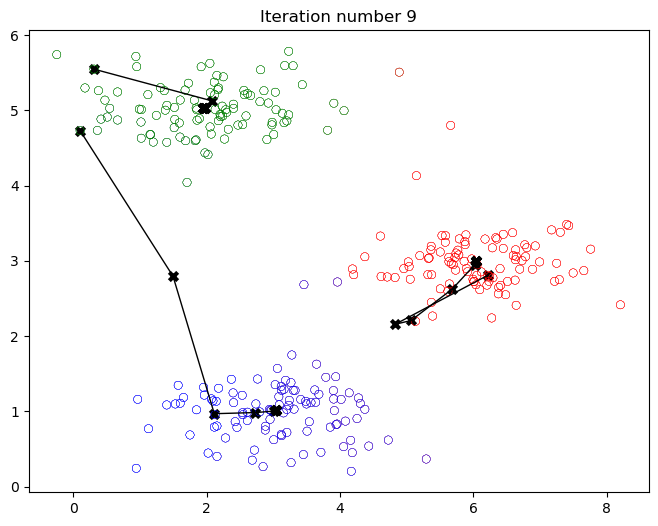

In [19]:
K = 3
max_iters = 10

initial_centroids = kMeans_init_centroids(X,K)

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [21]:
#Load image

original_img = plt.imread('bird_small.png')

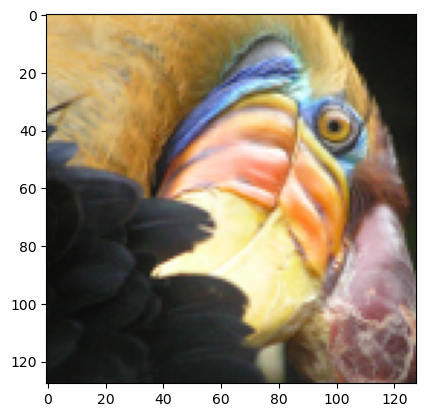

In [22]:
plt.imshow(original_img)

In [23]:
print("Shape of original_img is : ", original_img.shape)

Shape of original_img is :  (128, 128, 3)


In [24]:
X_img = np.reshape(original_img,(original_img.shape[0] * original_img.shape[1], 3))

In [25]:
K=16
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 09
K-Means iteration 19
K-Means iteration 29
K-Means iteration 39
K-Means iteration 49
K-Means iteration 59
K-Means iteration 69
K-Means iteration 79
K-Means iteration 89
K-Means iteration 99


<Figure size 800x600 with 0 Axes>

In [26]:
print("Shape of idx :", idx.shape)
print("Closest centroid for the first elements :", idx[:5])

Shape of idx : (16384,)
Closest centroid for the first elements : [15  9  9 15 15]


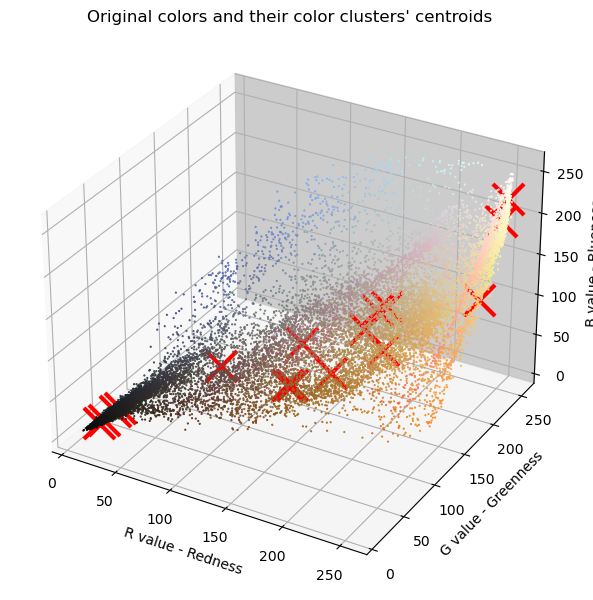

In [27]:
plot_kMeans_RGB(X_img, centroids, idx, K)

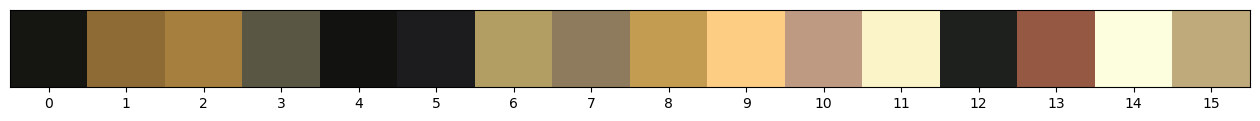

In [28]:
show_centroid_colors(centroids)

In [29]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original_img.shape)

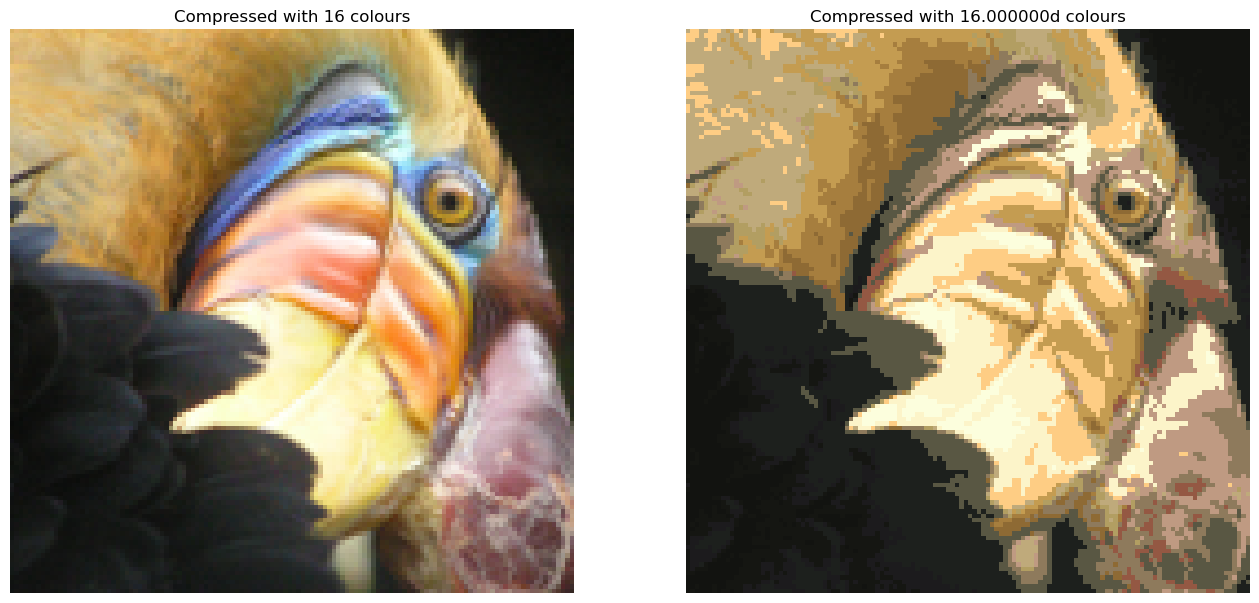

In [31]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Compressed with %d colours'%K)
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %fd colours'%K)
ax[1].set_axis_off()